In [1]:
# Step 1: Import Libraries
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# Step 2: Load Datasets
train_df = pd.read_csv("/content/drive/MyDrive/Data Set For Task/Churn Prdiction Data/churn-bigml-80.csv")
test_df = pd.read_csv("/content/drive/MyDrive/Data Set For Task/Churn Prdiction Data/churn-bigml-20.csv")


In [3]:
# Step 3: Basic Exploration
print(train_df.head())
print(train_df.info())
print(train_df['Churn'].value_counts())  # Target column


  State  Account length  Area code International plan Voice mail plan  \
0    KS             128        415                 No             Yes   
1    OH             107        415                 No             Yes   
2    NJ             137        415                 No              No   
3    OH              84        408                Yes              No   
4    OK              75        415                Yes              No   

   Number vmail messages  Total day minutes  Total day calls  \
0                     25              265.1              110   
1                     26              161.6              123   
2                      0              243.4              114   
3                      0              299.4               71   
4                      0              166.7              113   

   Total day charge  Total eve minutes  Total eve calls  Total eve charge  \
0             45.07              197.4               99             16.78   
1             27.47   

In [6]:
# Step 4: Preprocessing

# Drop only the existing irrelevant columns
cols_to_drop = ['State', 'Area code']  # Removed 'Phone'
train_df = train_df.drop(columns=cols_to_drop)
test_df = test_df.drop(columns=cols_to_drop)

# Label Encoding for categorical columns
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

label_cols = ['International plan', 'Voice mail plan']
for col in label_cols:
    train_df[col] = le.fit_transform(train_df[col])
    test_df[col] = le.transform(test_df[col])

# Encode the target column 'Churn'
train_df['Churn'] = le.fit_transform(train_df['Churn'])
test_df['Churn'] = le.transform(test_df['Churn'])


In [7]:
# Step 5: Split Features and Labels
X_train = train_df.drop('Churn', axis=1)
y_train = train_df['Churn']
X_test = test_df.drop('Churn', axis=1)
y_test = test_df['Churn']


In [8]:
# Step 6: Feature Scaling (optional but improves performance)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [9]:
# Step 7: Logistic Regression Model
lr = LogisticRegression()
lr.fit(X_train_scaled, y_train)
y_pred_lr = lr.predict(X_test_scaled)

print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))


Logistic Regression Accuracy: 0.8545727136431784
              precision    recall  f1-score   support

           0       0.88      0.97      0.92       572
           1       0.47      0.19      0.27        95

    accuracy                           0.85       667
   macro avg       0.68      0.58      0.59       667
weighted avg       0.82      0.85      0.83       667



In [10]:
# Step 8: Random Forest Model
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)  # No scaling needed
y_pred_rf = rf.predict(X_test)

print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))


Random Forest Accuracy: 0.9535232383808095
              precision    recall  f1-score   support

           0       0.95      0.99      0.97       572
           1       0.96      0.71      0.81        95

    accuracy                           0.95       667
   macro avg       0.96      0.85      0.89       667
weighted avg       0.95      0.95      0.95       667



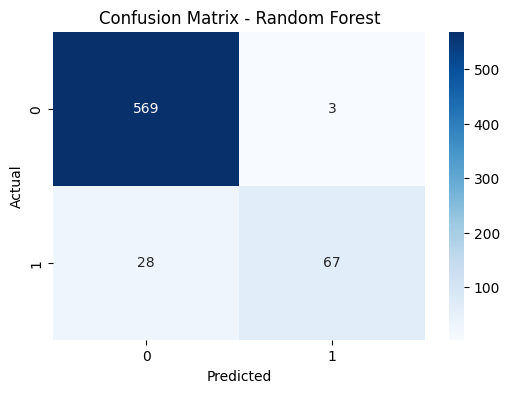

In [11]:
# Step 9: Confusion Matrix for Random Forest
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Random Forest')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
